# Programming Exercise 2:Logistic Regression(in python)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
%matplotlib inline

## 1.Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

### 1.1 Visualizeing the data

Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.

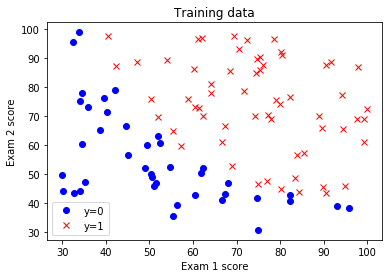

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]
 [  1.          45.08327748  56.31637178]
 [  1.          61.10666454  96.51142588]
 [  1.          75.02474557  46.55401354]
 [  1.          76.0987867   87.42056972]
 [  1.          84.43281996  43.53339331]
 [  1.          95.86155507  38.22527806]
 [  1.          75.01365839  30.60326323]
 [  1.          82.30705337  76.4819633 ]
 [  1.          69.36458876  97.71869196]
 [  1.          39.53833914  76.03681085]
 [  1.          53.97105215  89.20735014]
 [  1.          69.07014406  52.74046973]
 [  1.          67.94685548  46.67857411]
 [  1.          70.66150955  92.92713789]
 [  1.          76.97878373  47.57596365]
 [  1.          67.37202755  42.83843832]
 [  1.          89.67677575  65.79936593]
 [  1.          50.53478829  48.85581153]
 [  1.          34.21206098  44.20

In [64]:
data=np.loadtxt('ex2data1.txt',delimiter=',')
m=data.shape[0]
n=data.shape[1]-1
x1,x2,y=np.hsplit(data,3)
X=np.hstack((np.ones((m,1)),x1,x2))
sum0,sum1=0,0
for i in range(m):
    if y[i]==0:sum0+=1
    elif y[i]==1:sum1+=1
x1_0,x2_0=np.zeros((sum0)),np.zeros((sum0)) #represent the examples that y=0
x1_1,x2_1=np.zeros((sum1)),np.zeros((sum1)) #represent the examples that y=1
dex1,dex2=0,0
for i in range(m):
    if y[i]==0:
        x1_0[dex1]=x1[i]
        x2_0[dex1]=x2[i]
        dex1+=1
    elif y[i]==1:
        x1_1[dex2]=x1[i]
        x2_1[dex2]=x2[i]
        dex2+=1
#plot the data
plt.figure(1)
plt.plot(x1_0,x2_0,'bo',label="y=0")
plt.plot(x1_1,x2_1,'rx',label="y=1")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Training data")
plt.legend()
plt.show()
print(X)

### 1.2implementation

#### 1.2.1 sigmoid function

Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as:
$$h_{\theta }(x)=g(\theta ^Tx)$$
where function g is the sigmoid function. The sigmoid function is defined as:
$$g(z)=\frac{1}{1+e^{-z}}$$

#### 1.2.2 Cost function and gradient

cost function:
$$J(\theta )=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}logh_{\theta }(x^{(i)})+(1-y^{(i)})log(1-h_{\theta }(x^{(i)}))]$$
gradient descent:
repeat{
$$\theta _{j}:=\theta_{j}-\alpha\frac{\partial }{\partial \theta _{j}}J(\theta )$$
}
$$\frac{\partial }{\partial \theta _{j}}J(\theta )=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x)-y^{(i)})x_{j}^{(i)}$$

In [65]:
#define the H(theta) function
def sigmoid(z):
    res=1/(1+np.exp(-z))
    return res
def h(x):
    res=sigmoid(x)
    return res
#define the J(theta) function
def costfunction(theta,X,y):
    theta=theta.reshape(theta.shape[0],1)
    m=X.shape[0]
    J=res=np.sum(-y*np.log(h(np.dot(X,theta)))-(1-y)*np.log(1-h(np.dot(X,theta))))/m
    gradient=(1/m)*np.dot(X.T,1/(1+math.e**((-1)*np.dot(X,theta)))-y)
    return J,gradient.ravel()

#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [66]:
#use miminize function(advanced optimitation algrithm) to minimize J(theta)
initial_theta=np.zeros((n+1,1))
optimizeResult=minimize(fun=costfunction, x0=initial_theta.ravel(), \
                          args=(X, y), method='BFGS', \
                          jac=True, options={'maxiter':400})
theta = optimizeResult.x
theta = theta.reshape((theta.shape[0], 1))
cost = optimizeResult.fun
print(theta)
print(cost)

[[-25.16133284]
 [  0.2062317 ]
 [  0.2014716 ]]
0.20349770158944375


/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


In [67]:
inp=np.array([1,45,85])
predict=H_theta(theta,inp)
print("my prediction is",predict)
print("the accurate prediction is 0.776")

my prediction is [ 0.77629072]
the accurate prediction is 0.776


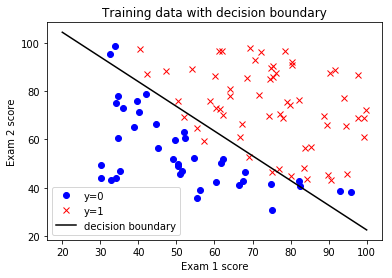

In [68]:
#plot the figure with decision boundary
plt.figure(1)
x1_axis=np.linspace(20,100,100)
plt.plot(x1_0,x2_0,'bo',label="y=0")
plt.plot(x1_1,x2_1,'rx',label="y=1")
plt.plot(x1_axis,(-theta[0]-theta[1]*x1_axis)/theta[2],'k-',label="decision boundary")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Training data with decision boundary")
plt.legend()
plt.show()

## 2.Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

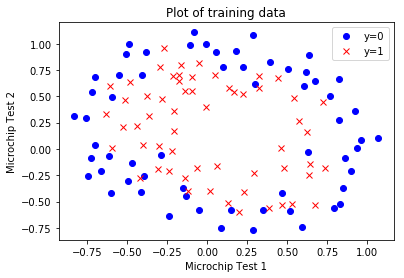

In [80]:
data=np.loadtxt('ex2data2.txt',delimiter=',')
m=data.shape[0] #numbers of examples
x1,x2,y=np.hsplit(data,3)
X=np.hstack((np.ones((m,1)),x1,x2))
sum0,sum1=0,0
for i in range(m):
    if y[i]==0:sum0+=1
    elif y[i]==1:sum1+=1
x1_0,x2_0=np.zeros((sum0)),np.zeros((sum0)) #represent the examples that y=0
x1_1,x2_1=np.zeros((sum1)),np.zeros((sum1)) #represent the examples that y=1
dex1,dex2=0,0
for i in range(m):
    if y[i]==0:
        x1_0[dex1]=x1[i]
        x2_0[dex1]=x2[i]
        dex1+=1
    elif y[i]==1:
        x1_1[dex2]=x1[i]
        x2_1[dex2]=x2[i]
        dex2+=1
plt.plot(x1_0,x2_0,'bo',label='y=0')
plt.plot(x1_1,x2_1,'rx',label='y=1')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plot of training data')
plt.legend()
plt.show()

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x 1 and x 2 up to the sixth power.
$$mapFeature(x)=\begin{bmatrix}1\\x_{1} \\x_{2}\\x_{1}^{2}\\x_{1}x_{2}\\x_{2}^{2} \\x_{1}^{3}\\\vdots  \\x_{1}x_{2}^{5}\\x_{2}^{6} \end{bmatrix}$$
As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting. In the next parts of the exercise, you
will implement regularized logistic regression to fit the data and also see for
yourself how regularization can help combat the overfitting problem.

In [81]:
#define the mapFeature function to map the features
def mapFeature(x1,x2):
    degree=6
    result=np.ones((x1.shape[0],1))
    for i in range(1,7):
        for j in range(i+1):
            result=np.hstack((result,np.power(x1,i-j)*np.power(x2,j)))
    return result

In [82]:
#map the features
X=mapFeature(x1,x2)
n=X.shape[1]-1 #numbers of features(not inlude x0)
#test
a=np.array([[1],[2]])
b=np.array([[2],[3]])
print(mapFeature(a,b))

[[   1.    1.    2.    1.    2.    4.    1.    2.    4.    8.    1.    2.
     4.    8.   16.    1.    2.    4.    8.   16.   32.    1.    2.    4.
     8.   16.   32.   64.]
 [   1.    2.    3.    4.    6.    9.    8.   12.   18.   27.   16.   24.
    36.   54.   81.   32.   48.   72.  108.  162.  243.   64.   96.  144.
   216.  324.  486.  729.]]


### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for
regularized logistic regression.
Recall that the regularized cost function in logistic regression is
$$J(\theta )=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}logh_{\theta }(x^{(i)})+(1-y^{(i)})log(1-h_{\theta }(x^{(i)}))]+\sum_{j=1}^{n}\frac{\lambda }{2m}\theta _{j}^{2}$$
Note that you should not regularize the parameter $\theta_{0}$
repeat{
$$\theta _{j}:=\theta_{j}-\alpha\frac{\partial }{\partial \theta _{j}}J(\theta )$$
}

The gradient of the cost function is a vector where the j th element is defined as follows:
for j=0:
$$\frac{\partial }{\partial \theta _{0}}J(\theta )=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x)-y^{(i)})x_{0}^{(i)}$$
for j>=1:
$$\frac{\partial }{\partial \theta _{j}}J(\theta )=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x)-y^{(i)})x_{j}^{(i)}+\frac{\lambda }{m}\theta _{j}$$
Once you are done,use the initial value of θ (initialized to all zeros) with $\lambda$=1. You should see that the
cost is about 0.693. And use the initial value of $\theta$ (initialized to all ones) with $\lambda$=10.You should see that the cost is about 3.16

In [83]:
#define the regularized costfunction
def costfunction_reg(theta,X,y,lambd):
    m=X.shape[0]
    theta=theta.reshape((theta.shape[0],1))
    theta0,theta_penalize=np.vsplit(theta,(1,))
    X_0,X_penalize=np.hsplit(X,(1,))
    #compute J
    J=(1/m)*np.sum(-y*np.log(h(np.dot(X,theta)))\
                   -(1-y)*np.log(1-h(np.dot(X,theta))),axis=0)\
    +(lambd/(2*m))*np.sum(theta_penalize**2,axis=0)
    #compute gradient
    gradient_0=(1/m)*np.dot(X_0.T,h(np.dot(X,theta))-y)
    gradient_penalize=(1/m)*np.dot(X_penalize.T,h(np.dot(X,theta))-y)+(lambd/m)*theta_penalize
    gradient=np.vstack((gradient_0,gradient_penalize))
    return J,gradient.ravel()
#test the costfunction
initialized_theta=np.zeros((n+1,1))
lambd=1
testVal,testGrad=costfunction_reg(initialized_theta,X,y,lambd)
print("when theta=all zeros,lambda=1,test value of my costfunction is",testVal)
print("expected cost(approx):0.693")
initialized_theta=np.ones((n+1,1))
lambd=10
testVal,testGrad=costfunction_reg(initialized_theta,X,y,lambd)
print("when theta=all ones,lambda=10,test value of my costfunction is",testVal)
print("expected cost(approx):3.16")

when theta=all zeros,lambda=1,test value of my costfunction is [ 0.69314718]
expected cost(approx):0.693
when theta=all ones,lambda=10,test value of my costfunction is [ 3.16450933]
expected cost(approx):3.16


In [84]:
initial_theta=np.zeros((n+1,1))
lambd=1
optimizeResult=minimize(fun=costfunction_reg,x0=initial_theta.ravel(),args=(X,y,lambd),method='BFGS',jac=True,\
                       options={'maxiter':400})
print(optimizeResult)
theta=optimizeResult.x
theta=theta.reshape((theta.shape[0],1))
cost=optimizeResult.fun
print(theta)
print(cost)

      fun: 0.5290027422869217
 hess_inv: array([[  1.07914459e+01,   1.00370134e+00,   1.21057597e+00,
         -8.74612304e+00,  -2.24476234e+00,  -1.30928770e+01,
          7.84297774e-01,  -1.64458964e+00,  -2.48377276e-01,
         -6.52804934e-01,  -4.71782992e+00,   2.58090129e+00,
         -4.03086221e+00,   1.03695104e-01,  -5.05427604e+00,
         -6.82360126e-02,  -2.45505447e-02,   8.83292432e-01,
         -1.68341536e+00,  -5.50856476e-01,   2.14265744e+00,
         -2.31021183e+00,   2.03047279e+00,  -1.59242276e+00,
          1.32651853e+00,  -1.98877507e+00,   2.80730511e-01,
          5.99591174e-01],
       [  1.00370134e+00,   1.28889754e+01,   4.31839874e+00,
         -6.95995281e+00,  -7.08201337e+00,  -3.92029201e-03,
          1.69141341e+00,   7.17737681e-01,   2.99492672e+00,
         -3.00897829e+00,  -3.78374906e+00,  -2.07471726e-01,
          9.68383482e-01,  -1.53929603e+00,  -7.57663155e-01,
         -5.27877013e-01,   5.65484974e-01,   1.54975987e+00,
  

In [86]:
#compute the accuracy
y_predict=h(np.dot(X,theta))
num=0
for i in range(m):
    if y_predict[i][0]>=0.5:
        y_predict[i][0]=1
    else:
        y_predict[i][0]=0
for i in range(m):
    if y_predict[i][0]==y[i][0]:
        num+=1
accuracy=num/m
print("My accuracy is",accuracy*100,'%')
print("Expected accuracy is about 83.1%")

My accuracy is 83.05084745762711 %
Expected accuracy is about 83.1%


### 2.4 Plotting the decision boundary

In [87]:
#when the decision boundary is not linear,it's a little complex,so I define a function to plot decision boundary
def plotDecisionBoundary(theta):
    global lambd
    #plot the training data
    global x1_0,x2_0,x1_1,x2_1
    plt.plot(x1_0,x2_0,'bo',label='y=0')
    plt.plot(x1_1,x2_1,'rx',label='y=1')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    #plot the contour
    x1=np.linspace(-1,1.5,100)
    x2=np.linspace(-1,1.5,100)
    z=np.zeros((x1.shape[0],x2.shape[0]))
    for i in range(x1.shape[0]):
        for j in range(x2.shape[0]):
            u=np.array([[x1[i]]])
            v=np.array([[x2[j]]])
            z[i][j]=np.dot(mapFeature(u,v),theta) #fill z
    x1,x2=np.meshgrid(x1,x2)
    z=z.T
    plt.contour(x1,x2,z,np.array([0]),label='decision boundary')
    plt.legend()
    plt.title(r"Plot of training data with decision boundary when $\lambda$="+str(lambd))

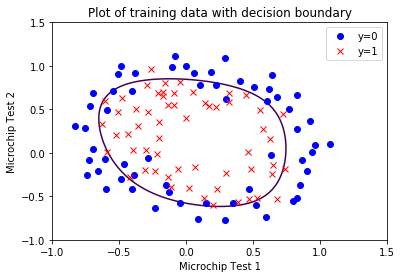

In [88]:
plotDecisionBoundary(theta)
plt.title("Plot of training data with decision boundary")
plt.show()

### 2.5 Plot decision boundary with different $\lambda$

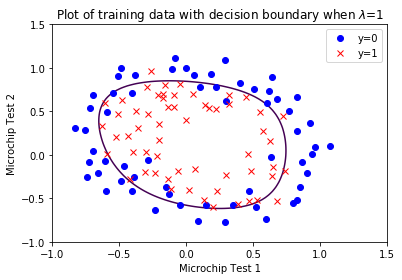

In [89]:
#plot decision boundary when lambda=1
plotDecisionBoundary(theta)
plt.show()

In [91]:
#restrat gradient descent when lambda=0
initial_theta=np.zeros((n+1,1))
lambd=0
optimizeResult=minimize(fun=costfunction_reg,x0=initial_theta.ravel(),args=(X,y,lambd),method='BFGS',jac=True,\
                       options={'maxiter':400})
print(optimizeResult)
theta=optimizeResult.x
theta=theta.reshape((theta.shape[0],1))
cost=optimizeResult.fun
print(theta)
print(cost)

      fun: 0.26349926855286376
 hess_inv: array([[  2.75706833e+03,   2.40359222e+03,   3.72927665e+03,
         -2.35694726e+04,  -4.93583936e+03,  -1.73013744e+04,
         -1.41512957e+04,  -1.98289498e+04,  -5.29971575e+03,
         -1.47407266e+04,   6.31956624e+04,   3.54370278e+04,
          9.80396585e+04,   1.84858822e+04,   3.70133817e+04,
          1.94362507e+04,   3.14469031e+04,   2.28766690e+04,
          2.06724219e+04,  -1.21562786e+04,   1.22294862e+04,
         -5.43110775e+04,  -5.42501026e+04,  -1.27472372e+05,
         -5.00970101e+04,  -8.32164682e+04,   1.22453136e+02,
         -2.38654280e+04],
       [  2.40359222e+03,   4.34450409e+03,   2.53625573e+03,
         -2.06319751e+04,  -4.38679754e+03,  -1.52536259e+04,
         -2.30236335e+04,  -1.16178990e+04,  -8.56917386e+03,
         -1.31628518e+04,   5.86031299e+04,   3.64629466e+04,
          9.18763787e+04,   1.50735646e+04,   3.25984970e+04,
          2.98675010e+04,   1.84595463e+04,   2.11414256e+04,
 

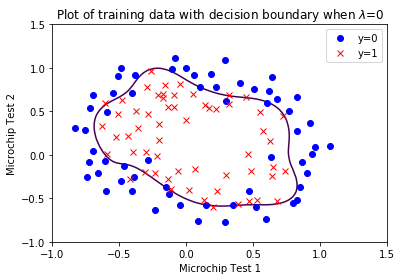

In [92]:
#plot decision boundary when lambda=0
plotDecisionBoundary(theta)
plt.show()

From the picture,we can know that it's overfitting

In [93]:
initial_theta=np.zeros((n+1,1))
lambd=100
optimizeResult=minimize(fun=costfunction_reg,x0=initial_theta.ravel(),args=(X,y,lambd),method='BFGS',jac=True,\
                       options={'maxiter':400})
print(optimizeResult)
theta=optimizeResult.x
theta=theta.reshape((theta.shape[0],1))
cost=optimizeResult.fun
print(theta)
print(cost)

      fun: 0.6864838338806889
 hess_inv: array([[  3.96690282e+00,  -5.15194720e-02,  -1.61633275e-01,
         -2.63573614e-01,   3.02043864e-02,  -3.04953262e-01,
         -5.89014344e-02,  -2.72442810e-02,  -1.67501362e-02,
         -1.25625146e-01,  -1.26989820e-01,   7.00355599e-03,
         -5.11435152e-02,   1.24077811e-02,  -1.60706156e-01,
         -5.07968417e-02,  -1.04533023e-02,  -9.68162038e-03,
         -1.62957975e-02,  -4.80441937e-03,  -9.86948632e-02,
         -7.93082113e-02,   1.66403897e-03,  -1.91436912e-02,
          2.17692989e-03,  -2.16927654e-02,   6.67661017e-03,
         -1.10616475e-01],
       [ -5.15194720e-02,   1.01088999e+00,   3.07722215e-02,
         -8.11484501e-03,  -1.29172410e-02,   9.46157579e-03,
          3.87443208e-03,  -2.78124463e-03,  -2.87445608e-03,
          4.02434452e-03,  -1.39710357e-02,  -1.60810572e-03,
         -4.85345480e-03,  -3.48623638e-03,  -7.43399868e-03,
         -1.93900869e-03,  -2.31786854e-03,  -4.98769336e-04,
  

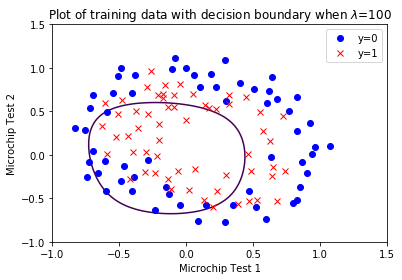

In [94]:
#plot decision boundary when lambda=100
plotDecisionBoundary(theta)
plt.show()

From the picture,we can know that it's underfitting